In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### OpenCV version

In [2]:
def geometryTransformation2(shape,cp=[0,0],teta=0,tr=[0,0]):
    
    h = cp[0]
    k = cp[1]
    h2 = tr[0]
    k2 = tr[1]
    if h2 ==0:
        h2 = h
        k2 = k
    
    #transformation matrix
    t1 = np.array([[1,0,-h],[0,1,-k],[0,0,1]])
    r1 = np.cos(teta*np.pi/180)
    r3 = np.sin(teta*np.pi/180)
    t2 = np.array([[r1,-r3,0],[r3,r1,0],[0,0,1]])
    t3 =np.array([[1,0,h2],[0,1,k2],[0,0,1]])
    trans = np.dot(np.dot(t3,t2),t1)
    
    new_shape = shape
    for i in range (0,len(shape)):
        point = shape[i]
        if len(point)<4:
            point.append(1)
        point = np.array(point)
        new_shape[i] = list(np.dot(trans,point)[0:2])
    
    return new_shape

In [3]:
#Define size of the background
img = np.ones((256,512,3), np.uint8)*255
cp = [75,125] #Center of the shape

# Polygon bound points
a = [50,50]
b = [50,200]
c = [100,200]
d = [100,50]
shape=[a,b,c,d]

#Polygon creation
pts = np.array(shape, np.int32)
pts = pts.reshape((-1,1,2))
img = cv.polylines(img,[pts],True,(0,0,0),1)

In [4]:
#Translate and rotate example 
tr = [200,125]
shape_new = geometryTransformation2(shape,cp,30,tr)

pts = np.array(shape_new, np.int32)
pts = pts.reshape((-1,1,2))
img = cv.polylines(img,[pts],True,(0,0,0),2)

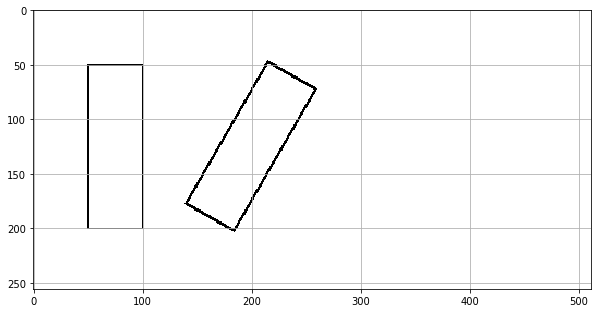

In [5]:
#Visualize translate and rotate
%matplotlib inline
%config InlineBackend.figure_format = 'png'
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid()
# plt.axis('off')
plt.show()

### **Shapely Geometry version**

In [6]:
from shapely.geometry import Polygon,LineString
from shapely import affinity
from descartes.patch import PolygonPatch
from matplotlib import pyplot
from figures import BLUE, SIZE, set_limits, plot_coords, color_isvalid,RED

In [7]:
# Build the  real shape
sh1 = [[0,0],[0,20],[30,10]]
sh2 = [[0,0],[0,20],[20,20],[20,0]]
sh3 = [[0,0],[0,20],[20,40],[40,0]]
sh4 = [[0,0],[0,20],[40,20],[40,0]]

In [8]:
def poligonbuild(shape,n):
    g = []
    for i in range(0,n):
        f = Polygon(shape)
        g.append(f)
    return g

In [9]:
def plot_all(g):
    fig = pyplot.figure(1, figsize=(15,5))
    ax = fig.add_subplot(121)
    ax.grid()
    axes = fig.gca()
    axes.set_xlim([0,400])
    axes.set_ylim([0,300])
    for i in range(0,len(g)):
        polygon= g[i]
        patch = PolygonPatch(polygon, facecolor=color_isvalid(polygon,valid=BLUE), alpha=0.5, zorder=2)
        ax.add_patch(patch)

In [10]:
def list_center(g): 
    cen_list = np.array([[0,0]])
    for i in range (0,len(g)):
        cen_list = np.concatenate((cen_list,[g[i].centroid.bounds[0:2]]))
    cen_list = np.delete(cen_list,0,axis=0)
    return cen_list

In [11]:
def update_center(g,new_center,new_teta):
    g_new = g
    for i in range(0,len(g_new)):
        off_pos = new_center[i] - g_new[i].centroid.bounds[0:2][0]
        g_new[i] = affinity.translate(g_new[i],xoff=off_pos[0],yoff=off_pos[1])
        g_new[i] = affinity.rotate(g_new[i],angle=new_teta[i],origin='centroid')
    return g_new

In [12]:
def obj_func(list_center):
    x = np.max(list_center[:,0])
    y = np.max(list_center[:,1])
    return x*y

In [13]:
#Example poligon have this constraint
g1 = poligonbuild(sh1,3)
g2 = poligonbuild(sh2,2)
g3 = poligonbuild(sh3,4)
g4 = poligonbuild(sh4,2)
g  = g1+g2+g3+g4
f  = list_center(g)

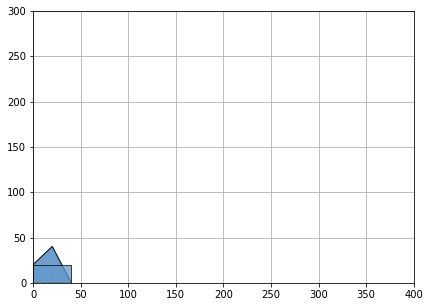

In [14]:
plot_all(g)

In [15]:
#Example to Detect interscection between shape 0 and shape 4
g[0].intersects(g[3])

True

In [16]:
#Update the shape number 4, translate to 150,150 then rotate 60
new_teta = np.array([0,0,0,45,0,0,0,0,0,0,0])
new_pos = f.copy()
new_pos[3] = [150,150]
g_new = update_center(g.copy(),new_pos,new_teta)

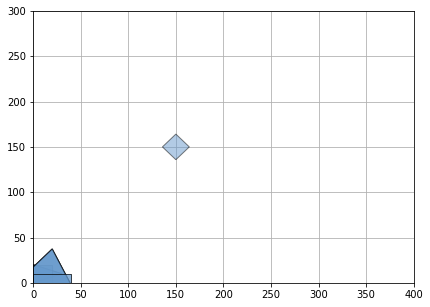

In [17]:
plot_all(g_new)

In [18]:
#Example to Detect interscection between shape 0 and shape 4
g_new[0].intersects(g_new[3])

False

In [19]:
#Default position
#g

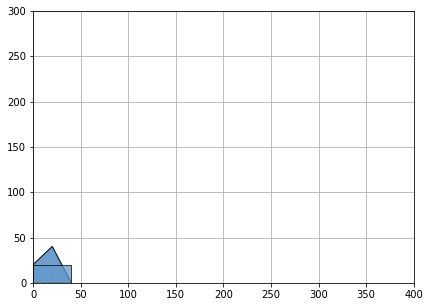

In [20]:
plot_all(g)

In [21]:
#Example to Detect interscection between shape 0 and shape 4
g[0].intersects(g[3])

True

In [22]:
# Objective Funtion
temp_f = list_center(g_new)
obj_func(temp_f)

22500.0

#### **SUMMARY**

In [23]:
# Build the shape, save the original shape and original position
g1 = poligonbuild(sh1,3)
g2 = poligonbuild(sh2,2)
g3 = poligonbuild(sh3,4)
g4 = poligonbuild(sh4,2)
ori_shape  = g1+g2+g3+g4
ori_cntr   = list_center(g)

In [24]:
# for example : Update the shape number 4, translate to 150,150 then rotate 60
new_teta = np.array([0,0,0,45,0,0,0,0,0,0,0])
new_pos = ori_cntr.copy()
#example to translate only one shape, shape 4
new_pos[1] = [100,100]
new_pos[2] = [200,200]
new_pos[3] = [150,150]
new_shape = update_center(ori_shape.copy(),new_pos,new_teta)

In [25]:
# Objective Funtion
temp_f = list_center(new_shape)
obj_func(temp_f)

40000.0

In [26]:
#Example to Detect interscection between shape 0 and shape 4
ori_shape[0].intersects(ori_shape[3])

True

In [27]:
# Original Posoition?
# Objective Funtion
temp_f = list_center(ori_shape)
obj_func(temp_f)

293.3333333333333

In [28]:
# def detect_intersection(g):
#     for i in range (1,len(g)+1):
#         for j in range (1,len(g)+1):
#             if i == j:
#                 continue
#             if g[i].intersects(g[j]):
#                 return True
#             else:
#                 return False

def detect_intersection(f):
    result = False
    for i in range  (0,len(f)):
        if result:
            break
        for ii in range (i+1,len(f)):
            result =  (f[i].intersects(f[ii]))
            if result:
                break
    return result

In [29]:
detect_intersection(ori_shape)

True

In [30]:
a = new_shape[0]
b = new_shape[1]
c = new_shape[2]
d = new_shape[3]

In [31]:
f = [a,b,c,d]

In [32]:
detect_intersection(f)

False

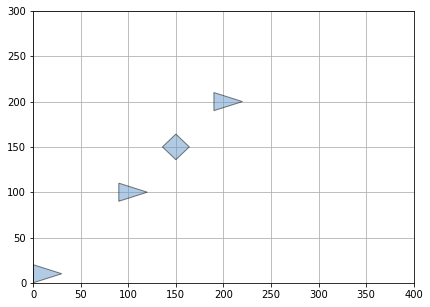

In [33]:
plot_all(f)

In [34]:
#Another check for detect intersection 
# for example : Update the shape number 4, translate to 150,150 then rotate 60
new_teta = np.array([0,0,0,45,0,0,0,0,0,0,0])
new_pos = ori_cntr.copy()
#example to translate only one shape, shape 4
new_pos[1] = [100,100]
new_pos[2] = [200,200]
new_shape = update_center(ori_shape.copy(),new_pos,new_teta)

In [35]:
a = new_shape[0]
b = new_shape[1]
c = new_shape[2]
d = new_shape[3]

In [36]:
f = [a,b,c,d]

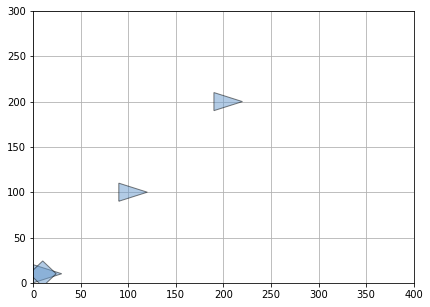

In [37]:
plot_all(f)

In [38]:
detect_intersection(f)

True

In [39]:
#Another check for detect intersection 
# for example : Update the shape number 4, translate to 150,150 then rotate 60
new_teta = np.array([0,0,0,45,0,0,0,0,0,0,0])
new_pos = ori_cntr.copy()
#example to translate only one shape, shape 4
new_pos[1] = [100,100]
new_pos[2] = [200,200]
new_pos[3] = [200,200]
new_shape = update_center(ori_shape.copy(),new_pos,new_teta)

In [40]:
a = new_shape[0]
b = new_shape[1]
c = new_shape[2]
d = new_shape[3]
f = [a,b,c,d]

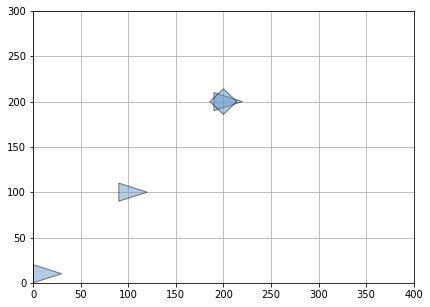

In [41]:
plot_all(f)

In [42]:
detect_intersection(f)

True

In [143]:
def boundPenalties(poly,yMax=210,xMax=400):
    result = False
    for i in poly:
        maxPolyX = i.bounds[2]
        maxPolyY = i.bounds[3]
        if maxPolyY > yMax:
            result = True
            return result
        if maxPolyX > xMax:
            result = True
            return result
    return result

In [157]:
#Combine detect intersection and boundpenalties

def detect_intersection(f,yMax=200,xMax=400):
    xMin = 0
    yMin = 0
    result = False
    for i in f:
        minPolyX = i.bounds[0]
        minPolyY = i.bounds[1]
        maxPolyX = i.bounds[2]
        maxPolyY = i.bounds[3]
        if minPolyY < yMin:
            #print('out of boundary')
            result = True
            return result
        if minPolyX < xMin:
            #print('out of boundary')
            result = True
            return result
        if maxPolyY > yMax:
            #print('out of boundary')
            result = True
            return result
        if maxPolyX > xMax:
            #print('out of boundary')
            result = True
            return result

    for i in range  (0,len(f)):
        if result:
            break
        for ii in range (i+1,len(f)):
            result =  (f[i].intersects(f[ii]))
            if result:
                #print('Intersect')
                break
    return result

In [158]:
#default setting are 400 for xMax and 200 for yMax,
detect_intersection(f)

True